In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mqt.predictor import rl, ml
df = pd.read_csv(ml.helper.get_path_trained_model() / 'backup_230828_res.csv', sep=',')
df = df.reset_index()

In [296]:
df

,index,benchmark,num_qubits,MQTPredictor_fidelity_time,MQTPredictor_fidelity_fidelity,MQTPredictor_fidelity_critical_depth,MQTPredictor_critical_depth_time,MQTPredictor_critical_depth_fidelity,MQTPredictor_critical_depth_critical_depth,qiskit_ibm_washington_time,...,tket_rigetti_aspen_m2_critical_depth,tket_ionq_harmony_time,tket_ionq_harmony_fidelity,tket_ionq_harmony_critical_depth,tket_ionq_aria1_time,tket_ionq_aria1_fidelity,tket_ionq_aria1_critical_depth,tket_quantinuum_h2_time,tket_quantinuum_h2_fidelity,tket_quantinuum_h2_critical_depth
0,0,qft,8,49.555530,0.469672,0.573529,37.794260,0.043554,0.582569,4.581547,...,0.213115,1.143043,0.033410,0.535714,1.159204,0.484215,0.535714,0.970736,0.586636,0.535714
1,1,graphstate,28,46.624576,0.539889,0.678571,41.566261,0.000000,0.770213,3.862137,...,0.598425,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.217284,0.538271,0.678571
2,2,wstate,26,46.011557,0.395496,0.460000,39.108087,0.000000,0.555046,13.079850,...,0.460000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.728802,0.375071,0.460000
3,3,graphstate,30,46.750351,0.516634,0.800000,41.338714,0.000000,0.837607,3.969431,...,0.686869,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.419926,0.519225,0.800000
4,4,portfolioqaoa,7,48.921572,0.729536,0.603175,36.827586,0.022418,0.603175,8.010814,...,0.418367,2.083335,0.000531,0.603175,2.146745,0.198800,0.603175,1.789595,0.326688,0.603175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,qftentangled,5,27.738741,0.708865,0.366667,22.961042,0.123874,0.362319,0.954014,...,0.305556,0.551828,0.217340,0.333333,0.551462,0.725103,0.333333,0.549808,0.760196,0.357143
496,496,qftentangled,5,60.739500,0.708865,0.366667,12.216259,0.014980,0.513661,0.082274,...,0.305556,0.551469,0.217340,0.333333,0.596115,0.725103,0.333333,0.544531,0.760196,0.357143
497,497,realamprandom,11,22.608089,0.013317,0.751515,13.076333,0.000378,0.751515,9.871931,...,0.615646,3.760272,0.000021,0.751515,3.769664,0.105065,0.751515,4.341891,0.069195,0.751515
498,498,wstate,21,12.903618,0.612303,0.450000,16.292422,0.029184,0.421053,4.157879,...,0.450000,-1.000000,-1.000000,-1.000000,1.158341,0.546757,0.450000,1.276360,0.455886,0.450000


In [297]:
df["benchmark_id"]=df["benchmark"].astype(str)+ "_" + df["num_qubits"].astype(str)+ "_" + df["index"].astype(str)

## Add best datapoints from other compilation flows

In [336]:
df['min_other_fidelity'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_fidelity') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['max_other_fidelity'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_fidelity') and 'MQT' not in col]].max(), axis=1)
df['min_other_critical_depth'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].replace(-1, np.nan).min(skipna=True), axis=1)
df['max_other_critical_depth'] = df.apply(lambda row: row[[col for col in row.index if col.endswith('_critical_depth') and 'MQT' not in col]].max(), axis=1)


<Axes: xlabel='benchmark_id', ylabel='MQTPredictor_fidelity_fidelity'>

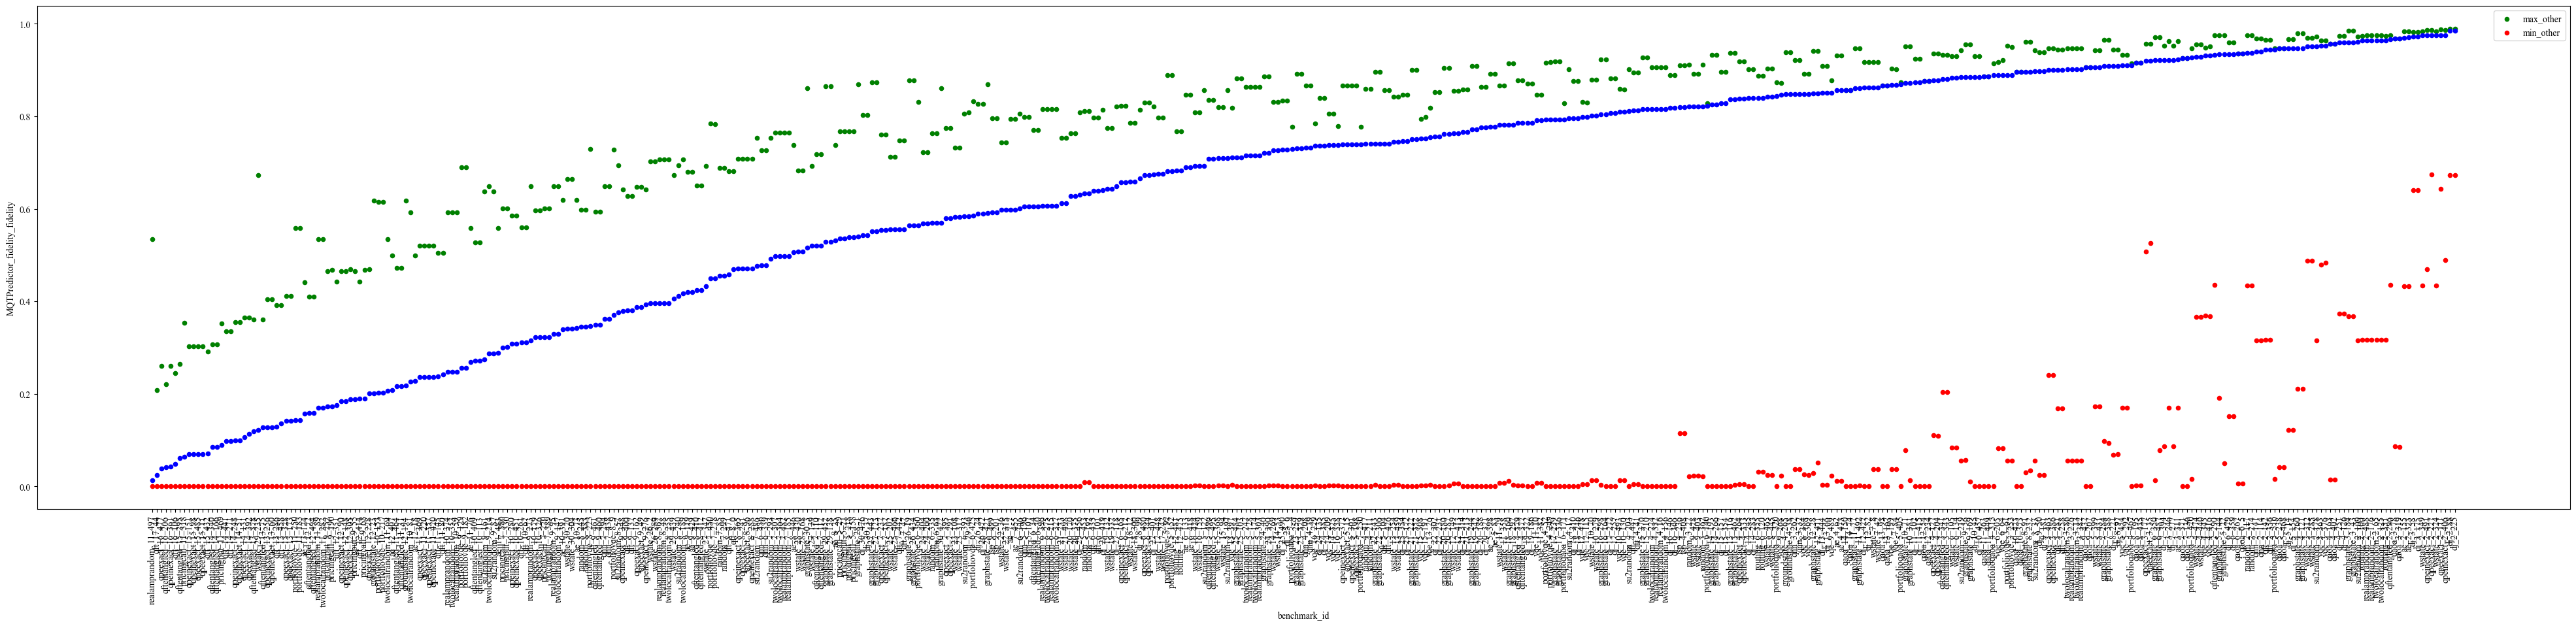

In [337]:
df = df.sort_values(by=['MQTPredictor_fidelity_fidelity'])
ax = df.plot(x="benchmark_id", y="max_other_fidelity", label="max_other", rot=90, kind="scatter", color="green", figsize=(50,10))
df.plot(x="benchmark_id", y="min_other_fidelity", label="min_other", rot=90, kind="scatter", ax=ax, color="red")
df.plot(x="benchmark_id", y="MQTPredictor_fidelity_fidelity", kind="scatter", rot=90, ax=ax, color="blue")

<Axes: xlabel='benchmark_id', ylabel='MQTPredictor_critical_depth_critical_depth'>

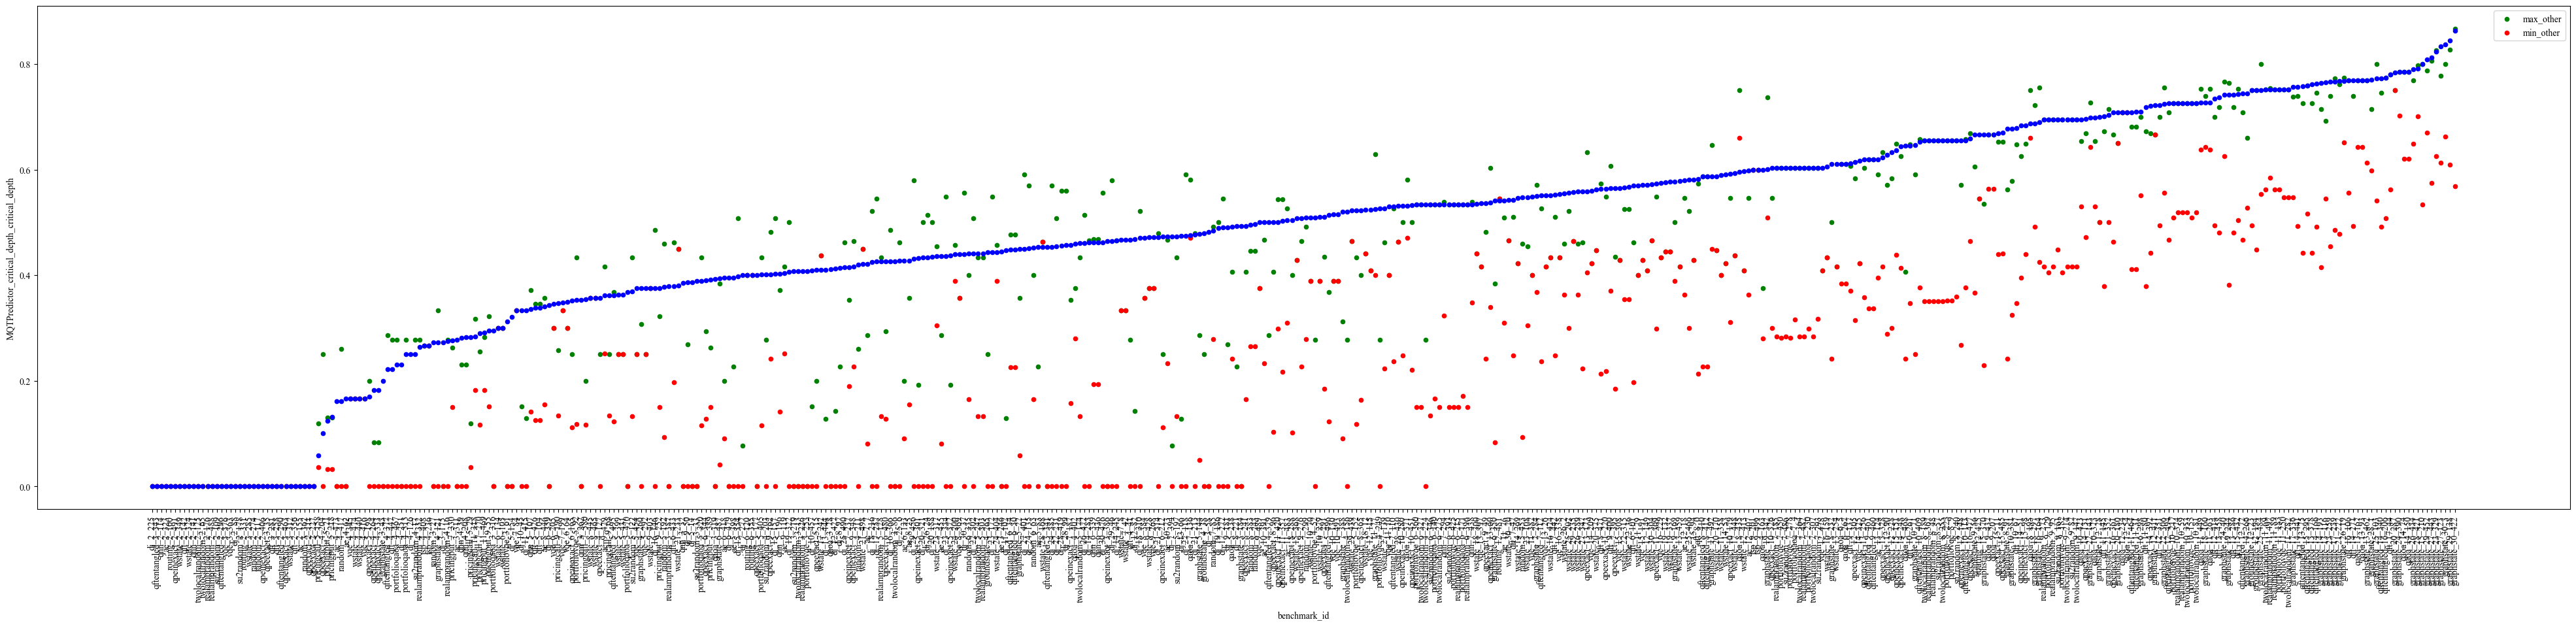

In [342]:
df = df.sort_values(by=['MQTPredictor_critical_depth_critical_depth'])
ax = df.plot(x="benchmark_id", y="max_other_critical_depth", label="max_other", rot=90, kind="scatter", color="green", figsize=(50,10))
df.plot(x="benchmark_id", y="min_other_critical_depth", label="min_other", rot=90, kind="scatter", ax=ax, color="red")
df.plot(x="benchmark_id", y="MQTPredictor_critical_depth_critical_depth", kind="scatter", rot=90, ax=ax, color="blue")

## Normalize

In [187]:
for index, row in df.iterrows():
    max_fidelity = max(row[col] for col in df.columns if col.endswith('_fidelity') and "MQT" not in col)
    for col in df.columns:
        if col.endswith('_fidelity'):
            df.at[index, col] /= max_fidelity

for index, row in df.iterrows():
    max_crit_depth = max(row[col] for col in df.columns if col.endswith('_critical_depth') and "MQT" not in col)
    if max_crit_depth == 0:
        continue
    for col in df.columns:
        if col.endswith('_critical_depth'):
            df.at[index, col] /= max_crit_depth

In [188]:
df

,index,benchmark,num_qubits,MQTPredictor_fidelity_time,MQTPredictor_fidelity_fidelity,MQTPredictor_fidelity_critical_depth,MQTPredictor_critical_depth_time,MQTPredictor_critical_depth_fidelity,MQTPredictor_critical_depth_critical_depth,qiskit_ibm_washington_time,...,tket_ionq_harmony_time,tket_ionq_harmony_fidelity,tket_ionq_harmony_critical_depth,tket_ionq_aria1_time,tket_ionq_aria1_fidelity,tket_ionq_aria1_critical_depth,tket_quantinuum_h2_time,tket_quantinuum_h2_fidelity,tket_quantinuum_h2_critical_depth,benchmark_id
0,0,qft,8,49.555530,0.689130,1.000000,37.794260,0.063905,1.015761,4.581547,...,1.143043,0.049022,0.934066,1.159204,0.710469,0.934066,0.970736,0.860747,0.934066,qft_8_0
1,1,graphstate,28,46.624576,0.621116,0.950000,41.566261,0.000000,1.078298,3.862137,...,-1.000000,-1.150451,-1.400000,-1.000000,-1.150451,-1.400000,1.217284,0.619254,0.950000,graphstate_28_1
2,2,wstate,26,46.011557,0.563106,1.000000,39.108087,0.000000,1.206621,13.079850,...,-1.000000,-1.423797,-2.173913,-1.000000,-1.423797,-2.173913,1.728802,0.534024,1.000000,wstate_26_2
3,3,graphstate,30,46.750351,0.600342,1.000000,41.338714,0.000000,1.047009,3.969431,...,-1.000000,-1.162026,-1.250000,-1.000000,-1.162026,-1.250000,1.419926,0.603353,1.000000,graphstate_30_3
4,4,portfolioqaoa,7,48.921572,0.938914,1.000000,36.827586,0.028853,1.000000,8.010814,...,2.083335,0.000683,1.000000,2.146745,0.255856,1.000000,1.789595,0.420448,1.000000,portfolioqaoa_7_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,qftentangled,5,27.738741,0.848818,0.995238,22.961042,0.148331,0.983437,0.954014,...,0.551828,0.260250,0.904762,0.551462,0.868262,0.904762,0.549808,0.910284,0.969388,qftentangled_5_495
496,496,qftentangled,5,60.739500,0.848818,0.995238,12.216259,0.017937,1.394223,0.082274,...,0.551469,0.260250,0.904762,0.596115,0.868262,0.904762,0.544531,0.910284,0.969388,qftentangled_5_496
497,497,realamprandom,11,22.608089,0.024925,0.996939,13.076333,0.000707,0.996939,9.871931,...,3.760272,0.000039,0.996939,3.769664,0.196644,0.996939,4.341891,0.129507,0.996939,realamprandom_11_497
498,498,wstate,21,12.903618,0.812804,1.000000,16.292422,0.038740,0.935673,4.157879,...,-1.000000,-1.327453,-2.222222,1.158341,0.725795,1.000000,1.276360,0.605167,1.000000,wstate_21_498


In [189]:
df.MQTPredictor_fidelity_fidelity.describe()

count    500.000000
mean       0.766817
std        0.223727
min        0.024925
25%        0.629885
50%        0.853705
75%        0.945383
max        1.000000
Name: MQTPredictor_fidelity_fidelity, dtype: float64

In [179]:
df = df.sort_values(by=['benchmark_id'])

# New Evaluation Scheme

In [180]:
list_cols_fid = [x for x in df.columns if x.endswith("fidelity")]

In [181]:
cmap = plt.get_cmap("viridis", len(list_cols_fid))
custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

## Fidelity

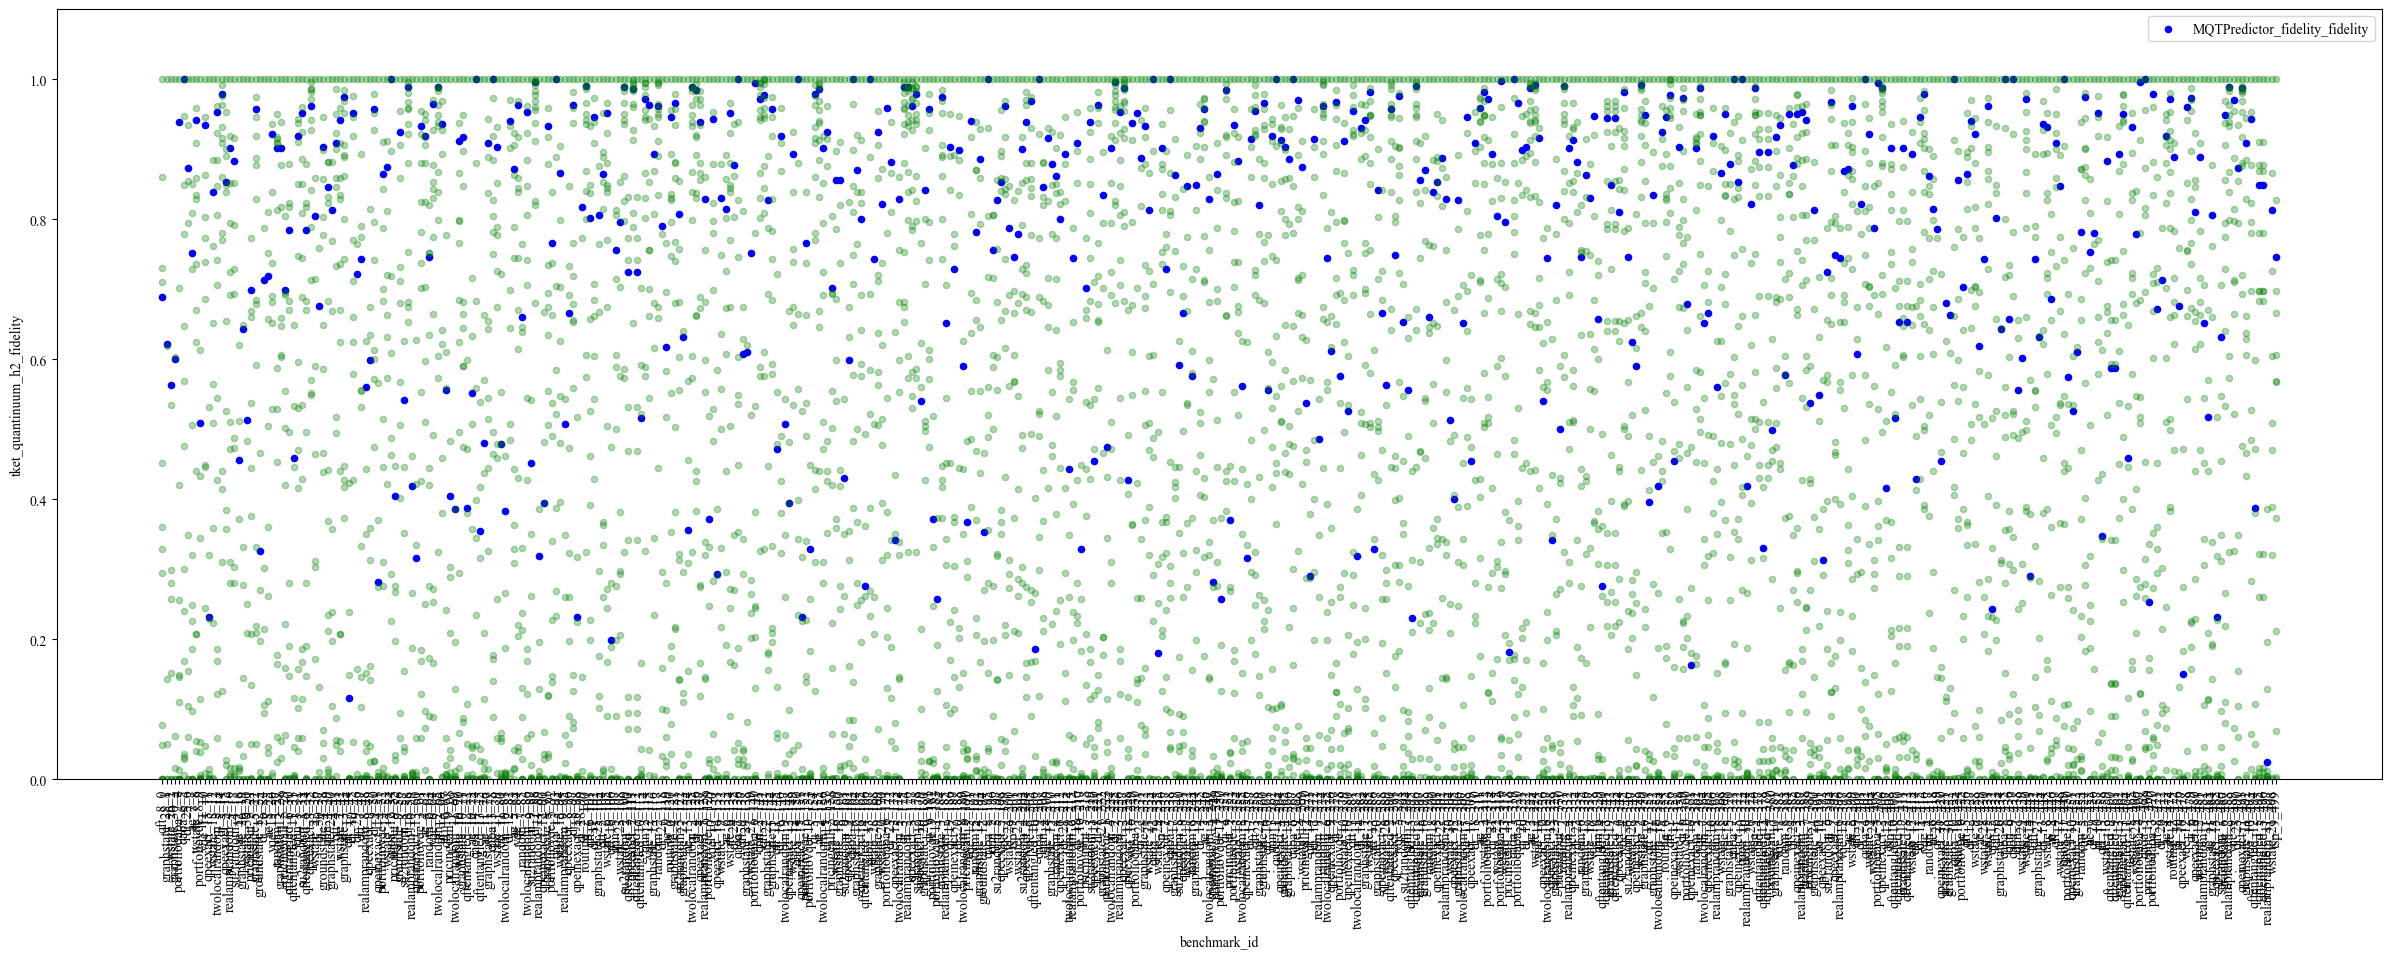

In [198]:
ax = df.plot(x="benchmark_id", y=["MQTPredictor_fidelity_fidelity"], kind="scatter", rot=90, label="MQTPredictor_fidelity_fidelity", figsize=(30,10), color="blue")
#df.plot(x="benchmark_id", y=["MQTPredictor_critical_depth_fidelity"], kind="scatter", rot=90, label="MQTPredictor_critical_depth_fidelity", figsize=(30,10), color="red", ax=ax)

for i, c in enumerate(list_cols_fid):
    if c.endswith("fidelity") and "MQTPredictor" not in c:
            df.plot(x="benchmark_id", y=c, kind="scatter", rot=90, ax=ax, ylim=(0,1.1), color="green", alpha=0.3)

## Critical Depth

In [97]:
list_cols_depth = [x for x in df.columns if x.endswith("critical_depth")]

In [98]:
df.MQTPredictor_fidelity_critical_depth.describe()

count    500.000000
mean       0.664437
std        0.399850
min        0.000000
25%        0.421853
50%        0.842783
75%        1.000000
max        1.000000
Name: MQTPredictor_fidelity_critical_depth, dtype: float64

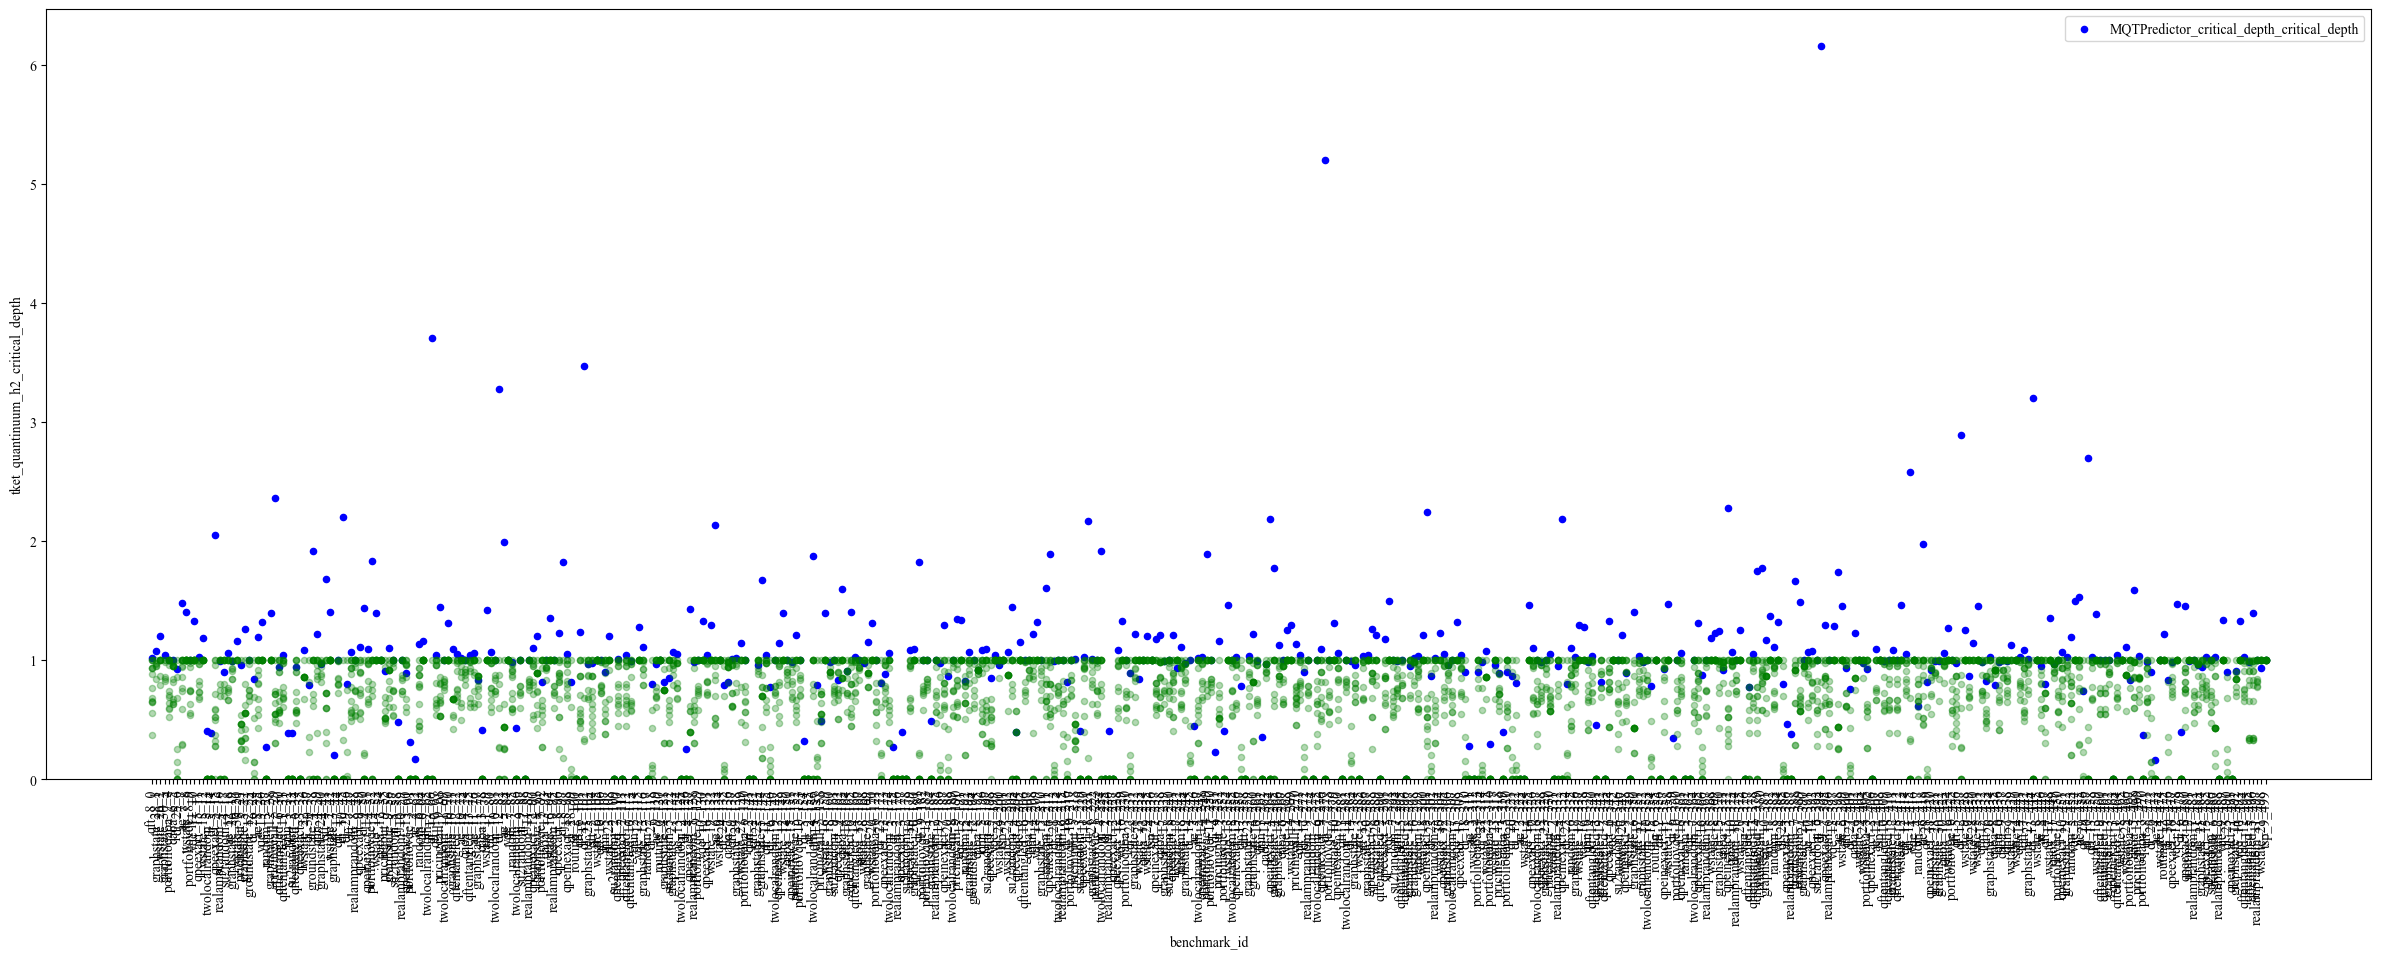

In [196]:
ax = df.plot(x="benchmark_id", y=["MQTPredictor_critical_depth_critical_depth"], kind="scatter", rot=90, label="MQTPredictor_critical_depth_critical_depth", figsize=(30,10), color="blue")
#df.plot(x="benchmark_id", y=["MQTPredictor_fidelity_critical_depth"], kind="scatter", rot=90, label="MQTPredictor_fidelity_critical_depth", figsize=(30,10), color="red", ax=ax)

for i, c in enumerate(list_cols_depth):
    if c.endswith("critical_depth") and "MQTPredictor" not in c:
        df.plot(x="benchmark_id", y=c, kind="scatter", rot=90, ax=ax, ylim=0, color="green", alpha=0.3)

# New Rankings

In [100]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

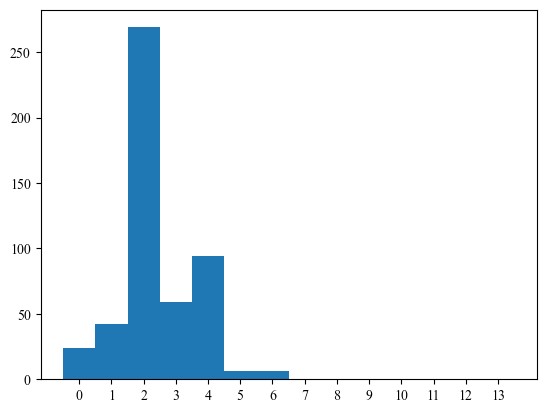

In [193]:
df['Rank_MQT_fidelity'] = df.apply(lambda row: sum(1 for col in df.columns if col.endswith('_fidelity') and not "MQT" in col and row['MQTPredictor_fidelity_fidelity'] >= row[col]), axis=1)
df['Rank_MQT_fidelity'] = len([col for col in df.columns if col.endswith('_fidelity') and not "MQT" in col]) - df.Rank_MQT_fidelity
plt.hist(df.Rank_MQT_fidelity.values, bins=range(0,15,1), align="left")
plt.xticks(range(0,14,1));

In [102]:
len(df[df['Rank_MQT_fidelity']==0])

24

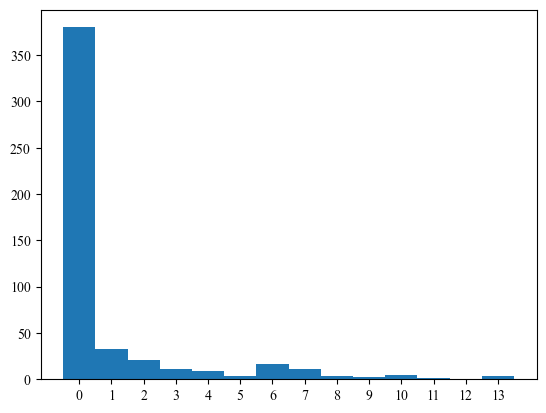

In [103]:
df['Rank_MQT_critical_depth'] = df.apply(lambda row: sum(1 for col in df.columns if col.endswith('_critical_depth') and not "MQT" in col and row['MQTPredictor_critical_depth_critical_depth'] >= row[col]), axis=1)
df['Rank_MQT_critical_depth'] = len([col for col in df.columns if col.endswith('_critical_depth') and not "MQT" in col]) - df.Rank_MQT_critical_depth
plt.hist(df.Rank_MQT_critical_depth.values, bins=range(0,15,1), align="left")
plt.xticks(range(0,14,1));

In [104]:
len(df[df['Rank_MQT_critical_depth']==0])

380

# Old

In [134]:
df = pd.read_csv(ml.helper.get_path_trained_model() / 'backup_230828_res.csv', sep=',')

In [135]:
df.MQTPredictor_fidelity_critical_depth.describe()

count    500.000000
mean       0.379425
std        0.265390
min        0.000000
25%        0.100000
50%        0.427052
75%        0.603175
max        0.866667
Name: MQTPredictor_fidelity_critical_depth, dtype: float64

In [136]:
df.qiskit_ibm_washington_critical_depth.describe()

count    500.000000
mean       0.293602
std        0.227555
min        0.000000
25%        0.062810
50%        0.313930
75%        0.447368
max        0.807018
Name: qiskit_ibm_washington_critical_depth, dtype: float64

In [137]:
df.tket_ibm_washington_critical_depth.describe()

count    500.000000
mean       0.326030
std        0.224918
min        0.000000
25%        0.100000
50%        0.362745
75%        0.483333
max        0.767857
Name: tket_ibm_washington_critical_depth, dtype: float64

In [138]:
num_bins = 60
color_qiskit = "#440154"
color_TKET = "#21918c"
size = 14
legendsize = 12

In [139]:
df["MQTPredictor-Qiskit_Fid"]=df["MQTPredictor_fidelity_fidelity"]-df["qiskit_ibm_washington_fidelity"]
df["MQTPredictor-TKET_Fid"]=df["MQTPredictor_fidelity_fidelity"]-df["tket_ibm_washington_fidelity"]

In [140]:
df["MQTPredictor-Qiskit_Fid"][df["MQTPredictor-Qiskit_Fid"] > 0.0 ].count()/len(df)

0.988

In [141]:
df["MQTPredictor-TKET_Fid"][df["MQTPredictor-TKET_Fid"] > 0.0 ].count()/len(df)

0.994

In [142]:
df["MQTPredictor-Qiskit_Fid"]=df["MQTPredictor_fidelity_fidelity"]-df["qiskit_ibm_washington_fidelity"]
df["MQTPredictor-tket_ibm_washington_Fid"]=df["MQTPredictor_fidelity_fidelity"]-df["tket_ibm_washington_fidelity"]
df["MQTPredictor-Qiskit_Crit_Depth"]=df["MQTPredictor_critical_depth_critical_depth"]-df["qiskit_ibm_washington_critical_depth"]
df["MQTPredictor-TKET_Crit_Depth"]=df["MQTPredictor_critical_depth_critical_depth"]-df["tket_ibm_washington_critical_depth"]

In [143]:

max_val_bench = max([df.groupby(["benchmark"])["MQTPredictor-Qiskit_Fid"].mean().max(), 
                     df.groupby(["benchmark"])["MQTPredictor-TKET_Fid"].mean().max(), 
                     df.groupby(["benchmark"])["MQTPredictor-Qiskit_Crit_Depth"].mean().max(), 
                     df.groupby(["benchmark"])["MQTPredictor-TKET_Crit_Depth"].mean().max()
                    ]
                     )
min_value_bench = min([df.groupby(["benchmark"])["MQTPredictor-Qiskit_Fid"].mean().min(),
                      df.groupby(["benchmark"])["MQTPredictor-TKET_Fid"].mean().min(), 
                      df.groupby(["benchmark"])["MQTPredictor-Qiskit_Crit_Depth"].mean().min(), 
                      df.groupby(["benchmark"])["MQTPredictor-TKET_Crit_Depth"].mean().min()])

In [144]:
df["MQTPredictor-Qiskit_Fid"][df["MQTPredictor-Qiskit_Fid"] > 0.0 ].count()/len(df)

0.988

In [145]:
df["MQTPredictor-TKET_Fid"][df["MQTPredictor-TKET_Fid"] > 0.0 ].count()/len(df)

0.994

In [146]:
df["MQTPredictor-Qiskit_Crit_Depth"][df["MQTPredictor-Qiskit_Crit_Depth"] >= 0.0 ].count()/len(df)

0.958

In [147]:
df["MQTPredictor-TKET_Crit_Depth"][df["MQTPredictor-TKET_Crit_Depth"] >= 0.0 ].count()/len(df)

0.956

# Expected Fidelity

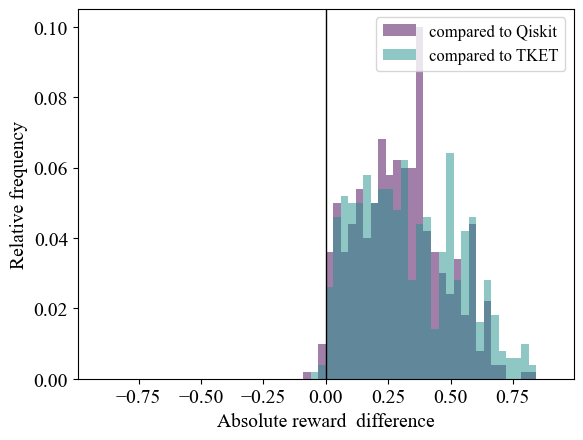

In [148]:
max_val = max([df["MQTPredictor-Qiskit_Fid"].max(), df["MQTPredictor-TKET_Fid"].max(), -df["MQTPredictor-Qiskit_Fid"].min(), -df["MQTPredictor-TKET_Fid"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["MQTPredictor-Qiskit_Fid"].hist(bins=num_bins, alpha=0.5, range=xrange, color=color_qiskit, weights=np.ones(len(df["MQTPredictor-Qiskit_Fid"])) / len(df["MQTPredictor-Qiskit_Fid"]), xlabelsize=size, ylabelsize=size)
df["MQTPredictor-TKET_Fid"].hist(bins=num_bins, ax=ax, alpha=0.5, range=xrange, color=color_TKET, grid=False, weights=np.ones(len(df["MQTPredictor-TKET_Fid"])) / len(df["MQTPredictor-TKET_Fid"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward  difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/fidelity_hist.pdf', bbox_inches='tight')

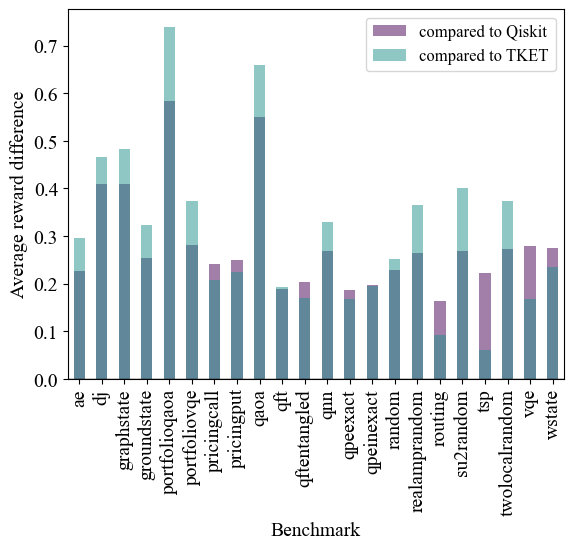

In [149]:
ax = df.groupby(["benchmark"])["MQTPredictor-Qiskit_Fid"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["MQTPredictor-TKET_Fid"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
#ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/fidelity_bench.pdf', bbox_inches='tight')

In [150]:
print(df["MQTPredictor-Qiskit_Fid"].mean(), df["MQTPredictor-TKET_Fid"].mean())

0.29960268193600004 0.3275423700082


# Critical Depth

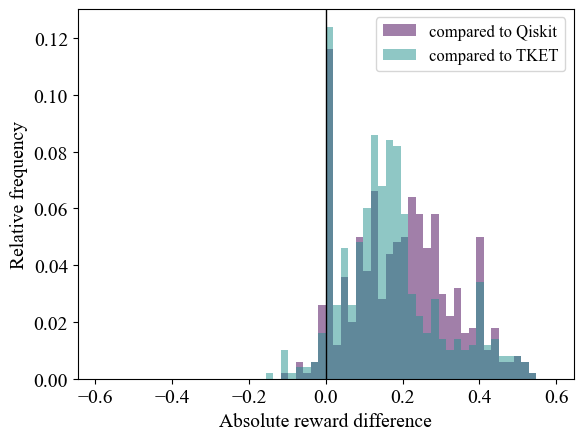

In [151]:
max_val = max([df["MQTPredictor-Qiskit_Crit_Depth"].max(), df["MQTPredictor-TKET_Crit_Depth"].max(), -df["MQTPredictor-Qiskit_Crit_Depth"].min(), -df["MQTPredictor-TKET_Crit_Depth"].min()])
xrange = (-max_val-(max_val)/10, max_val+(max_val)/10)
ax = df["MQTPredictor-Qiskit_Crit_Depth"].hist(bins=num_bins, alpha=0.5, range=xrange, color=color_qiskit, weights=np.ones(len(df["MQTPredictor-Qiskit_Crit_Depth"])) / len(df["MQTPredictor-Qiskit_Crit_Depth"]), xlabelsize=size, ylabelsize=size)
df["MQTPredictor-TKET_Crit_Depth"].hist(bins=num_bins, ax=ax, alpha=0.5, range=xrange, grid=False, color=color_TKET, weights=np.ones(len(df["MQTPredictor-TKET_Crit_Depth"])) / len(df["MQTPredictor-TKET_Crit_Depth"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/critical_depth_hist.pdf', bbox_inches='tight')

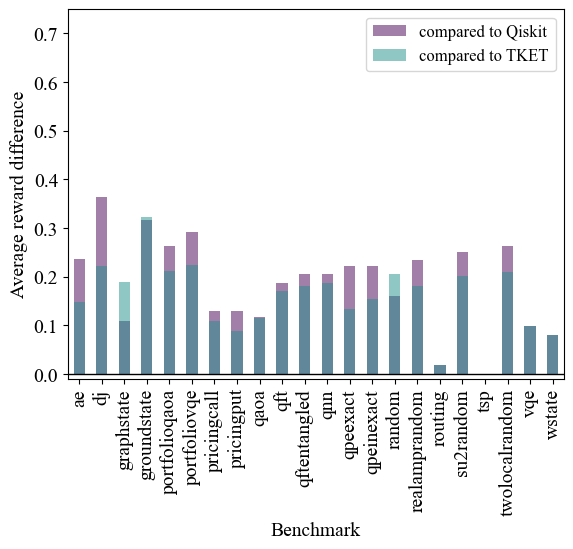

In [152]:
ax = df.groupby(["benchmark"])["MQTPredictor-Qiskit_Crit_Depth"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["benchmark"])["MQTPredictor-TKET_Crit_Depth"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/critical_depth_bench.pdf', bbox_inches='tight')

In [153]:
print(df["MQTPredictor-Qiskit_Crit_Depth"].mean(), df["MQTPredictor-TKET_Crit_Depth"].mean())

0.19326888870919998 0.1608415155402


# 2x2 Matrix With Mean Results and Optimization Criterion Comparison

In [154]:
MQT_fidelity = [df["MQTPredictor_fidelity_fidelity"].mean(),  df["MQTPredictor_fidelity_critical_depth"].mean()]
MQT_critical_depth = [df["MQTPredictor_critical_depth_fidelity"].mean(), df["MQTPredictor_critical_depth_critical_depth"].mean()]

In [155]:
print(np.round(MQT_fidelity,2))
print(np.round(MQT_critical_depth,2))

[0.64 0.38]
[0.16 0.49]
